<h1> Pizza or Not Pizza. </h1>
    
<p> I detta experiment används keras för att förutse om en bild är en bild av en pizza eller ej. </p> 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

<p> Ladda in träningsset flow från directory </p>

In [3]:
training_set = gen.flow_from_directory("image_dataset/training_set", target_size=(64, 64), class_mode="binary", batch_size=32)

Found 1536 images belonging to 2 classes.


<p> Ladda in testset flow från directory </p>

In [4]:
generator = ImageDataGenerator(rescale=1./255)
test_set = generator.flow_from_directory("image_dataset/test_set", target_size=(64, 64), class_mode="binary", batch_size=32)

Found 399 images belonging to 2 classes.


<p> Skapa cnn objekt </p>

In [5]:
cnn_model = tf.keras.models.Sequential()

<p> Lägger till lager. För bättre resultat används tre lager. </p>

In [6]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64, 64, 3], strides=(1,1)))

In [7]:
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding="same"))

In [8]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", strides=(1,1)))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding="same"))

In [9]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", strides=(1,1)))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding="same"))

Input layer

In [10]:
cnn_model.add(tf.keras.layers.Flatten())

In [11]:
cnn_model.add(tf.keras.layers.Dense(units=64,activation="relu"))

Eftersom modellen skiljer mellan två kategorier används sigmoid.

In [12]:
cnn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
cnn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

<p> Träna modellen </p>

In [14]:
cnn_model.fit(training_set, epochs = 20)

Epoch 1/20
48/48 [==============================] - 22s 441ms/step - loss: 0.9176 - accuracy: 0.5247
Epoch 2/20
48/48 [==============================] - 11s 228ms/step - loss: 0.6503 - accuracy: 0.6315
Epoch 3/20
48/48 [==============================] - 11s 235ms/step - loss: 0.6104 - accuracy: 0.6855
Epoch 4/20
48/48 [==============================] - 12s 240ms/step - loss: 0.6056 - accuracy: 0.6725
Epoch 5/20
48/48 [==============================] - 12s 250ms/step - loss: 0.5621 - accuracy: 0.7168
Epoch 6/20
48/48 [==============================] - 12s 245ms/step - loss: 0.5469 - accuracy: 0.7266
Epoch 7/20
48/48 [==============================] - 12s 242ms/step - loss: 0.5274 - accuracy: 0.7298
Epoch 8/20
48/48 [==============================] - 12s 244ms/step - loss: 0.5417 - accuracy: 0.7266
Epoch 9/20
48/48 [==============================] - 12s 242ms/step - loss: 0.5266 - accuracy: 0.7480
Epoch 10/20
48/48 [==============================] - 12s 240ms/step - loss: 0.4900 - accura

<p> Evaluerar modellens träffsäkerhet </p>

In [15]:
evaluation = cnn_model.evaluate(test_set, batch_size=32)

13/13 [==============================] - 3s 271ms/step - loss: 0.4799 - accuracy: 0.7845


In [16]:
val = str(round(evaluation[1] * 100,2))
print("%s%%"%val)

78.45%


Ladda test bilder

In [17]:
from keras.preprocessing import image

In [18]:
pizza = tf.keras.utils.load_img("image_dataset/single_prediction/pizza.jpg", target_size=(64,64))
not_pizza = tf.keras.utils.load_img("image_dataset/single_prediction/not_pizza.jpg", target_size=(64,64))

In [19]:
pizza_array = tf.keras.utils.img_to_array(pizza)
not_pizza_array = tf.keras.utils.img_to_array(not_pizza)

In [20]:
pizza_image = np.expand_dims(pizza_array, axis=0)
not_pizza_image = np.expand_dims(not_pizza_array, axis=0)

In [21]:
pizza_result = cnn_model.predict(pizza_image)
not_pizza_result = cnn_model.predict(not_pizza_image)

1/1 [==============================] - 0s 19ms/step


In [22]:
print(training_set.class_indices)

{'not_pizza': 0, 'pizza': 1}


<p> Resultat </p>

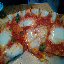

In [23]:
pizza

In [24]:
pizza_result[0,0]

1.0

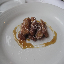

In [25]:
not_pizza

In [26]:
not_pizza_result[0,0]

0.0

Träffsäkerheten skiftar kring 70 till 80 procent men modellen gissar rätt var gång på föregående bilder i alla test.